#### Student Name: Galina Lopez 
#### Student Number: 10333429
##### Module: Advanced Data Analytics
##### CA1: Brief EDA of the Forest Fire Dataset



In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

#Reading the dataset in a dataframe using Pandas
df = pd.read_csv("C:/Users/End-User/Desktop/forestfires.csv") 

The dataset contains forest fire data from the Montesinho natural park,
from the Tr´as-os-Montes Northeast region of Portugal.

In [2]:
#Exploring the first five rows of the dataset
df.head() 

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
 #Exploring the last five rows of the dataset
df.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


The data consists of 517 entries. In the dataset, there are 13 attributes that are the spatial and
temporal attributes, four FWI components that are affected directly by the
weather conditions, four meteorological attributes, and the response variable,
the burned area. The data consist of 12 input variables that are X, Y,
month, day, FFMC, DMC, DC, ISI, temp, RH, wind, and rain and the response
variable that is area.

In [4]:
#Finding the data types of the attributes in the dataframe
df.dtypes 

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

Attribute Information:

For more information, read [Cortez and Morais, 2007]. 
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9 
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9 
3. month - month of the year: 'jan' to 'dec' 
4. day - day of the week: 'mon' to 'sun' 
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20 
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10 
9. temp - temperature in Celsius degrees: 2.2 to 33.30 
10. RH - relative humidity in %: 15.0 to 100 
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 

The forest Fire Weather Index(FWI) is the Canadian
System for rating fire danger and it includes six components. Fine Fuel Moisture
Code (FFMC), Duff Moisture Code (DMC), Drought Code (DC), Initial Spread
Index (ISI), Buildup Index (BUI) and FWI. The first three are related to fuel
codes: the FFMC denotes the moisture content surface litter and influences
ignition and fire spread, while the DMC and DC represent the moisture content
of shallow and deep organic layers, which affect fire intensity. The ISI is a score
that correlates with fire velocity spread, while BUI represents the amount of
available fuel. The FWI index is an indicator of fire intensity and it combines
the two previous components. Different scales are used for each of the FWI
elements, but high values suggest more severe burning conditions. The BUI and
FWI were discarded since they are dependent of the previous values.

In [5]:
#Looking at the descriptive statistics of the numerical attributes in the dataframe
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


From the descriptive statistics of the attributes we can see that there are no missing values in our dataset.
On further inspection we saw the area attribute ranged from min = 0.0 to max = 1090.84 with a median = 0.52 << mean = 12.847292 
and std=63.655818. We found this interesting so we decided to explore the area attribute further and see what we could discern from it. 
The area variable represents the total burned area in hectares (ha). In the dataset, there are 247
samples with a zero value. All entries denote fire occurrences and zero value
means that an area lower than 1ha/100 = 100m2 was burned.
Thus the burned area denoted a positive skew, highly right-skewed, 
with a median = 0.52 << mean = 12.847292, as the output variable: area is very concentrated towards 0.0. 
We can plot a histogram of the area attribute to confirm and explore even further.

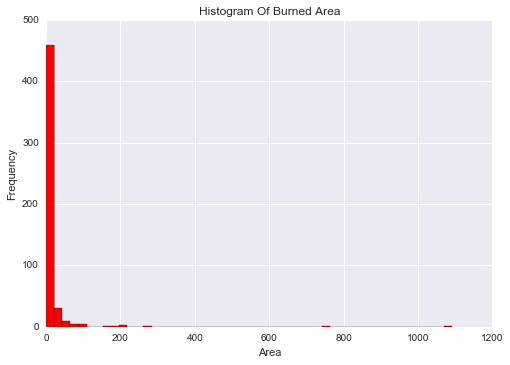

In [6]:
df['area'].hist(bins=50, color='red')
plt.title('Histogram Of Burned Area') 
plt.xlabel('Area')
plt.ylabel('Frequency')

The histogram confirms the distribution of the area attribute is highly 
skewed to the right. 
It also shows a couple of really large values that require further exploration.
We can plot a boxplot of the area attribute to confirm if these values are outliers.

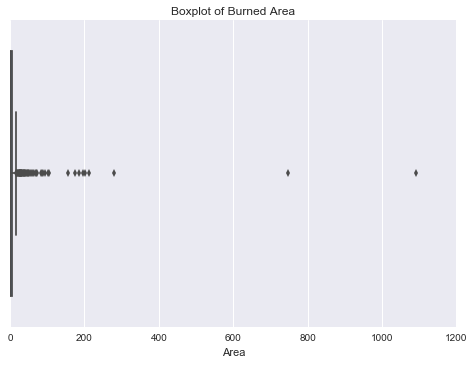

In [7]:
ax = sns.boxplot(df["area"])
plt.title('Boxplot of Burned Area') 
plt.xlabel('Area')

The boxplot confirms the presence of high outliers in the area attribute. These outliers will be the cases we are most 
interested to investigate in further explorations as they are the most costly to the state.

[0, 300, -1, 1]

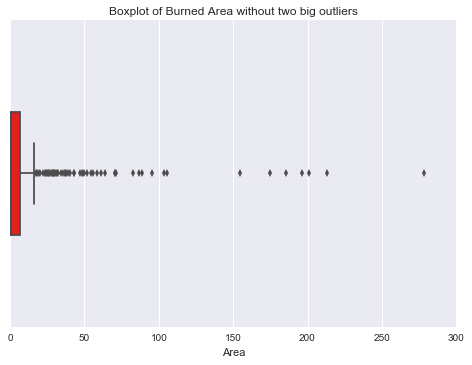

In [8]:
ax = sns.boxplot(df["area"], color='red')
plt.title('Boxplot of Burned Area without two big outliers') 
plt.xlabel('Area')
plt.axis([0, 300, -1, 1])

This boxplot without the two biggest outliers clearly illustrates that the area attribute is highly compressed towards 0 ie. 
the majority of the forest fires have a small burned area, close to 0.

Let's investigate the total number of fires per month and see what insights we can gather from our data.
We will use bar plots to visualize our findings.

In [9]:
months = df['month'].value_counts()
print months

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
jan      2
may      2
nov      1
Name: month, dtype: int64


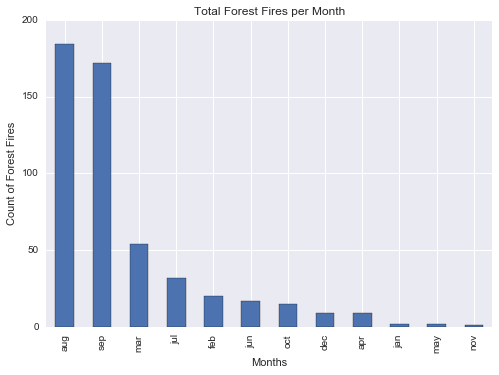

In [10]:
ax = months.plot(kind='bar')
ax.set_xlabel('Months')
ax.set_ylabel('Count of Forest Fires')
ax.set_title("Total Forest Fires per Month")

From our bar plot we can see that most fires occur significantly more during the months of August and September 
than the rest of the year. While not unexpected to find most fires during summer months it was surprising to find that such differences occur between the occurances in these two months and the rest of the year, especially 
since July, also a summer month, doesn't have these high occurances. March also shows a bit of an off trend so it will 
be another finding interesting to further investigate.

Let's investigate next the total number of fires per day of the week and see what insights we can gather this time.
We will use bar plots to visualize our findings.

In [11]:
days = df['day'].value_counts()
print days

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64


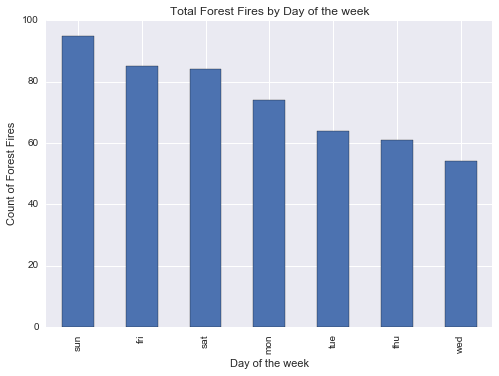

In [12]:
ax = days.plot(kind='bar')
ax.set_xlabel('Day of the week')
ax.set_ylabel('Count of Forest Fires')
ax.set_title("Total Forest Fires by Day of the week")

From our bar plot we can see that most fires occur during the weekend: Friday to Sunday which is what we expected.

Let's explore the relationship between burned area and FFMC. For this we will use a scatterplot of these two attributes and 
analyze its findings.

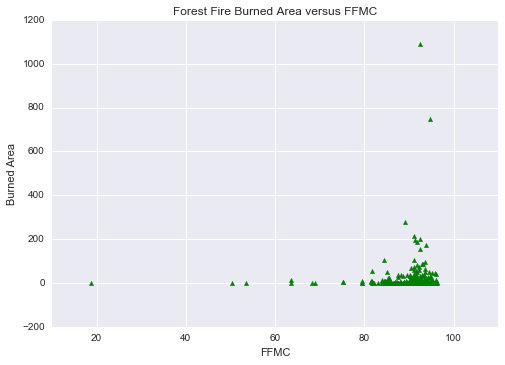

In [13]:
# Create a Figure object
fig = plt.figure()
# Create an Axes object
ax = fig.add_subplot(1,1,1) # one row, one column, first plot
# Plot the data
ax.scatter(df['FFMC'], df['area'], color="green", marker="^")
# Add a title
ax.set_title("Forest Fire Burned Area versus FFMC")
# Add some axis labels
ax.set_xlabel("FFMC")
ax.set_ylabel("Burned Area")

The scatterplot shows most small forest fires happen at high levels of FFMC. It also shows a couple of big fires 
which we previously determined through a histogram and boxplot to be our big outliers and therefore the cases we are 
most interested in exploring. These big fires also happen at high levels of FFMC. As a result we can equate high levels 
of FFMC with the occurance of forest fires in this dataset. 
We also noticed a small fire happening at low levels of FFMC which will require further exploration. 
It may be an outlier which corresponds to an erroneous entry in which case it may need to be removed from our analysis.

(-50, 300)

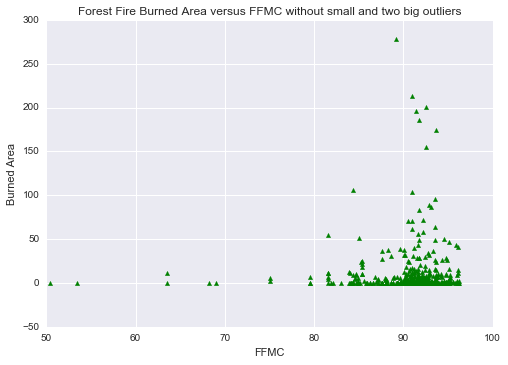

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['FFMC'], df['area'], color="green", marker="^")
# Add a title
ax.set_title("Forest Fire Burned Area versus FFMC without small and two big outliers")
# Add some axis labels
ax.set_xlabel("FFMC")
ax.set_ylabel("Burned Area")
# Add some axis limits
ax.set_xlim([50, 100])
ax.set_ylim([-50, 300])

This version of our previous scatterplot illustrates better the relationship between the attributes area and FFMC.

Let's calculate the summary statistics of the FFMC attribute next.

In [15]:
df['FFMC'].describe()

count    517.000000
mean      90.644681
std        5.520111
min       18.700000
25%       90.200000
50%       91.600000
75%       92.900000
max       96.200000
Name: FFMC, dtype: float64

We can quickly see that the average/mean value of FFMC is 90.644681, with the minimum being 18.7 and the maximum being 96.2. 
The median is 91.6, with the first quartile being 90.2 or less, and the last quartile being at least 92.9.

Let's compute the summary statistics of the area attribute as well.

In [16]:
df['area'].describe()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64

We can quickly see that the average/mean value of the area is 12.847292, with the minimum being 0.0 and the maximum being 1090.84. 
The median is 0.52, with the first quartile being 0.0, and the last quartile being at least 6.57. These stats point out to a 
really right-skewed distribution for the area variable which we confirmed through a histogram and boxplot. 

Next let's take a numerical attribute, bin it into categories, and plot it using a bar plot.
We decided to bin the temperature temp attribute into three bins: low < 10, medium and high > 20.

In [17]:
df['temp'].describe()

count    517.000000
mean      18.889168
std        5.806625
min        2.200000
25%       15.500000
50%       19.300000
75%       22.800000
max       33.300000
Name: temp, dtype: float64

In [18]:
#Binning function
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()
  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]
  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)
  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

#Binning temperature
cut_points = [10,20]
labels = ["low","medium","high"]
df["temp_bin"] = binning(df["temp"], cut_points, labels)
print pd.value_counts(df["temp_bin"], sort=False)

low        36
medium    250
high      231
dtype: int64


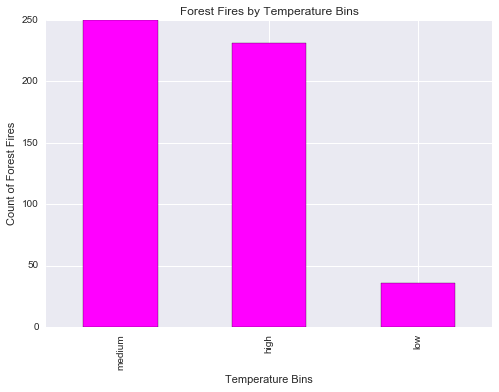

In [19]:
temp_bin = df['temp_bin'].value_counts()
ax = temp_bin.plot(kind='bar', color='magenta')
ax.set_xlabel('Temperature Bins')
ax.set_ylabel('Count of Forest Fires')
ax.set_title("Forest Fires by Temperature Bins")

Next let's use line graphs to explore the trends in forest fires over time. Firstly over months.

jan      2
feb     20
mar     54
apr      9
may      2
jun     17
jul     32
aug    184
sep    172
oct     15
nov      1
dec      9
Name: month, dtype: int64


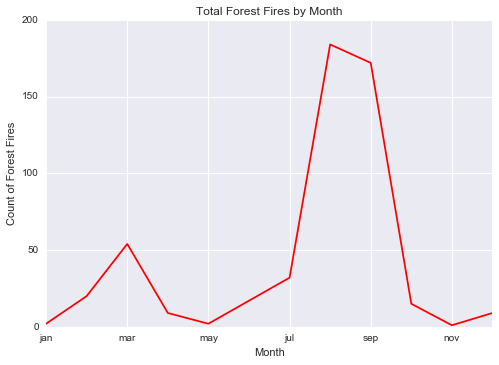

In [20]:
sorted_months = months.loc[['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']]
print sorted_months

sorted_months.plot(title="Total Forest Fires by Month",legend=None, color='red')
plt.xlabel('Month')
plt.ylabel('Count of Forest Fires')

We can clearly see the sharp rise of forest fires from July to August, staying high for September and the subsequent sharp fall
into October with that interestng peak in March. Once again Aug and Sep values are significantly higher than the rest 
of the year as we previously saw on the corresponding bar plot.

Now let's see the trend of forest fires over days of the week. 
We are plotting a stacked line graph and bar chart for this purpose.

mon    74
tue    64
wed    54
thu    61
fri    85
sat    84
sun    95
Name: day, dtype: int64


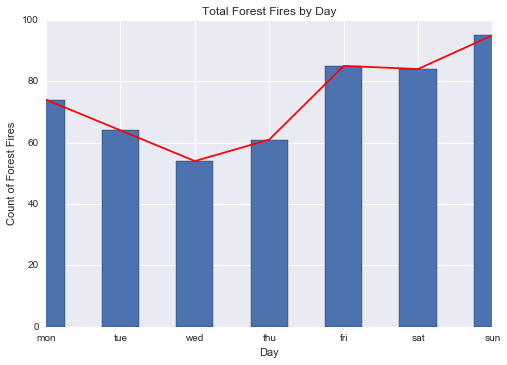

In [21]:
sorted_days = days.loc[['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']]
print sorted_days

ax = sorted_days.plot(kind = 'bar', legend=None)
ax.set_xlabel('Day')
ax.set_ylabel('Count of Forest Fires')
ax.set_title("Total Forest Fires by Day")

sorted_days.plot(title="Total Forest Fires by Day", color='red', legend=None)

We can clearly see the rise of forest fires over Friday, Saturday and Sunday with respect to the rest of the week.
Showing once again that most forest fires in the dataset tend to happen over the weekend: Friday to Sunday.

This concludes our brief start of the Forest Fires exploratory analysis through the use of matplotlib pyplot: line graphs, bar charts, histograms and boxplots and some descriptive statistics. 
This is only the start of our exploration, further investigations were identified.
Among our findings were a couple of high area forest fires that will be interesting to explore
even further as they are the most costly to the state. We also found that most of the fires are small in area and happen 
at high levels of FFMC. We also found a small fire at low levels of FFMC that constitutes more than likely an erroneous 
entry and if so will need to be removed from further analysis.